In [1]:
import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import qinfer as qi

In [2]:
sys.path.append("/home/bf16951/QMD")
import qmla

# Quickly construct models and plot dynamics

In [137]:
n_qubits = 5
true_model_terms_params = {
    # spin
    'pauliSet_1_x_d{}'.format(n_qubits) : 1.94e9,
    'pauliSet_1_y_d{}'.format(n_qubits) : 1.94e9,
    'pauliSet_1_z_d{}'.format(n_qubits) : 1.94e9,
    
    'pauliSet_1J2_zJz_d{}'.format(n_qubits) : 2.14e6, 
    'pauliSet_1J3_zJz_d{}'.format(n_qubits) : 2.4e6, 
    'pauliSet_1J4_zJz_d{}'.format(n_qubits) : 2.14e6, 
    'pauliSet_1J5_zJz_d{}'.format(n_qubits) : 2.14e6, 
#     'pauliSet_1J6_zJz_d{}'.format(n_qubits) : 2.14e6, 

    'pauliSet_1J2_yJy_d{}'.format(n_qubits) : 2.7e6, 
    'pauliSet_1J3_yJy_d{}'.format(n_qubits) : 2.4e6, 
    'pauliSet_1J4_yJy_d{}'.format(n_qubits) : 2.14e6, 
    'pauliSet_1J5_yJy_d{}'.format(n_qubits) : 2.14e6, 
#     'pauliSet_1J6_yJy_d{}'.format(n_qubits) : 2.14e6, 

    'pauliSet_1J2_xJx_d{}'.format(n_qubits) : 2.7e6, 
    'pauliSet_1J3_xJx_d{}'.format(n_qubits) : 2.4e6, 
    'pauliSet_1J4_xJx_d{}'.format(n_qubits) : 2.14e6, 
    'pauliSet_1J5_xJx_d{}'.format(n_qubits) : 2.14e6, 
#     'pauliSet_1J6_xJx_d{}'.format(n_qubits) : 2.14e6, 

    # nitrogen nuclei 
    'pauliSet_2_x_d{}'.format(n_qubits) : 3.37e9,
    'pauliSet_2_y_d{}'.format(n_qubits) : 3.37e9,
    'pauliSet_2_z_d{}'.format(n_qubits) : 3.37e9,

    # carbon nuclei - 3rd qubit
    'pauliSet_3_x_d{}'.format(n_qubits) : 117e3,
    'pauliSet_3_y_d{}'.format(n_qubits) : 117e3,
    'pauliSet_3_z_d{}'.format(n_qubits) : 117e3,

    # carbon nuclei - 4th qubit
    'pauliSet_4_x_d{}'.format(n_qubits) : 117e3,
    'pauliSet_4_y_d{}'.format(n_qubits) : 117e3,
    'pauliSet_4_z_d{}'.format(n_qubits) : 117e3,

    # carbon nuclei - 5th qubit
    'pauliSet_5_x_d{}'.format(n_qubits) : 117e3,
    'pauliSet_5_y_d{}'.format(n_qubits) : 117e3,
    'pauliSet_5_z_d{}'.format(n_qubits) : 117e3,

    # carbon nuclei - 6th qubit
#     'pauliSet_6_x_d{}'.format(n_qubits) : 117e3,
#     'pauliSet_6_y_d{}'.format(n_qubits) : 117e3,
#     'pauliSet_6_z_d{}'.format(n_qubits) : 117e3,
}

true_model = '+'.join(
    (true_model_terms_params.keys())
)
true_model = qmla.construct_models.alph(true_model)

hamiltonian = None
for k in true_model_terms_params:
    
    param = true_model_terms_params[k]
    mtx = qmla.construct_models.compute(k)
    
    if hamiltonian is None: 
        hamiltonian = param * mtx
    else:
        hamiltonian += param * mtx

[|++'> probes] Noise factor: 0
Model: pauliSet_1J2_xJx_d5+pauliSet_1J2_yJy_d5+pauliSet_1J2_zJz_d5+pauliSet_1J3_xJx_d5+pauliSet_1J3_yJy_d5+pauliSet_1J3_zJz_d5+pauliSet_1J4_xJx_d5+pauliSet_1J4_yJy_d5+pauliSet_1J4_zJz_d5+pauliSet_1J5_xJx_d5+pauliSet_1J5_yJy_d5+pauliSet_1J5_zJz_d5+pauliSet_1_x_d5+pauliSet_1_y_d5+pauliSet_1_z_d5+pauliSet_2_x_d5+pauliSet_2_y_d5+pauliSet_2_z_d5+pauliSet_3_x_d5+pauliSet_3_y_d5+pauliSet_3_z_d5+pauliSet_4_x_d5+pauliSet_4_y_d5+pauliSet_4_z_d5+pauliSet_5_x_d5+pauliSet_5_y_d5+pauliSet_5_z_d5


Text(0.5, 0, 'Time $s$')

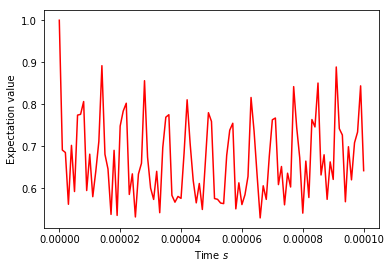

In [139]:
num_qubits = int(np.log2(np.shape(hamiltonian))[0])
probe_set = qmla.shared_functionality.probe_set_generation.plus_plus_with_phase_difference(
    num_probes=1, 
    max_num_qubits=num_qubits,
    noise_level=0
)
probe = probe_set[(0,num_qubits)]

max_time = 100e-6
time_increment = 1e-6
# max_time = 500e-6
# time_increment = 5e-6
times = np.arange(0, max_time, time_increment)

expectation_values = {
    t : qmla.shared_functionality.n_qubit_hahn_evolution(
        ham = hamiltonian, 
        t = t,
        state = probe
    )
    for t in times
}

ex_val_list = [expectation_values[t] for t in times]

print("Model:", true_model)
plt.plot(
    times,
    ex_val_list, 
    color='red',
    ms = 40, 
    markevery=10
)
# plt.semilogx()

plt.figsize=(15, 10)
plt.ylabel('Expectation value')
plt.xlabel('Time $s$')

In [88]:
%matplotlib inline